## Seeing the difference of the projection signature between analysing the whole image vs just the prize paper

In [2]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

########################
#This section just to get the images that we want (Where the ruler is on the top)

ruler_tb = []
ruler_lr = []

rootDir = '../ResizedSS4/'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        file_name = fname.split(".")
        #print('\t%s' % file_name[0])
        
        bin_sig3 = []
        peaks = []
        p = []
        
        #reading the file
        image = cv2.imread(dirName + '/' + fname)
        
        #Converting to greyscale
        gry = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sig = np.sum(gry, axis=1)
        
        #get threshold values
        minV = min(sig)
        
        ran = max(sig) - min(sig)
        ran_threshold = 0.2
        
        #Check for peaks, form binary signal, store pixel values for peak and append to peaks.
        for n in range(len(sig)):
            if sig[n] > minV + ran_threshold*ran:
                bin_sig3.append(5000)
                p.append(n)
            else:
                if n < len(sig) - 3:
                    if sig[n+3] > minV + ran_threshold*ran:
                        bin_sig3.append(5000)
                        p.append(n)
                    else:
                        bin_sig3.append(0)
                        if len(p) != 0:
                            peaks.append(p)
                            p = []
                        else:
                            continue
                else:
                    bin_sig3.append(0)
                    if len(p) != 0:
                        peaks.append(p)
                        p = []
                    else:
                        continue
                                    
        #plt.plot(sig)
        #plt.plot(bin_sig3)
        #plt.show()
        #print(bin_sig3)
        #print(len(peaks))
        
        if len(peaks)!=2:
            ruler_lr.append(file_name[0])
        else:
            data = [file_name[0],peaks]
            ruler_tb.append(data)

##########################

Found directory: ../ResizedSS4/


Successfully created the directory ../Outputs/Plots/Ruler_Removed_Diff/ 


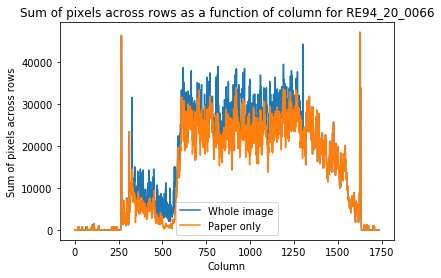

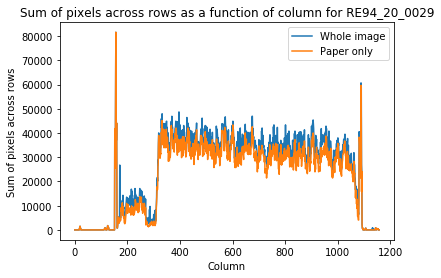

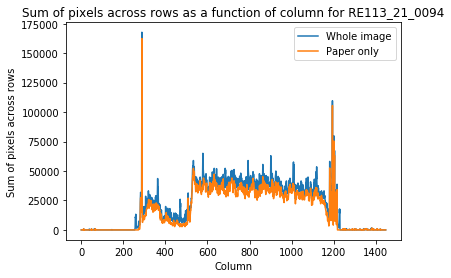

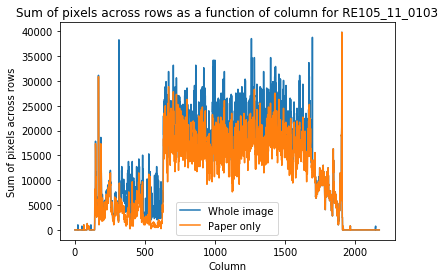

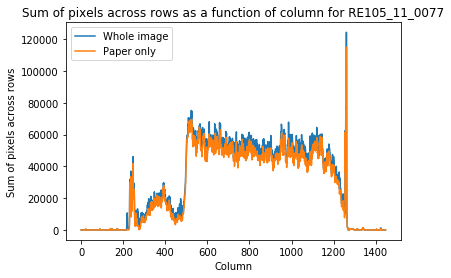

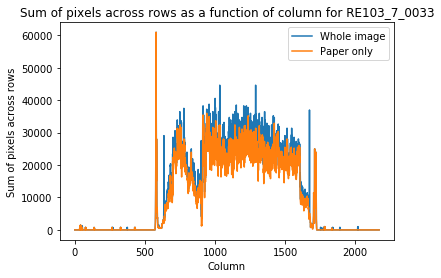

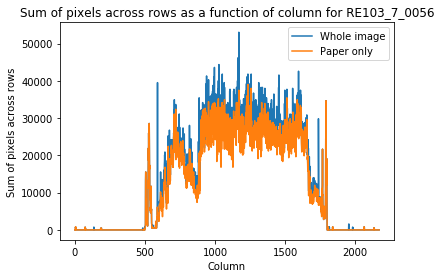

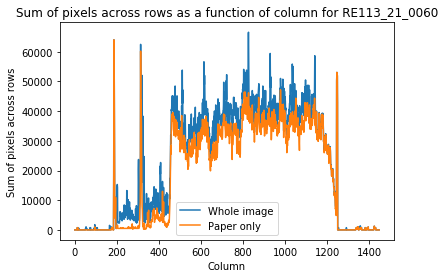

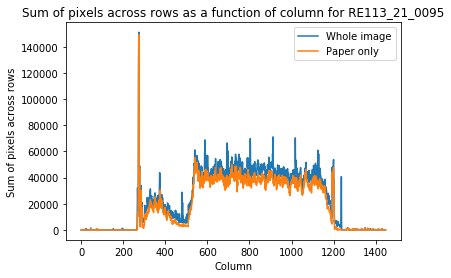

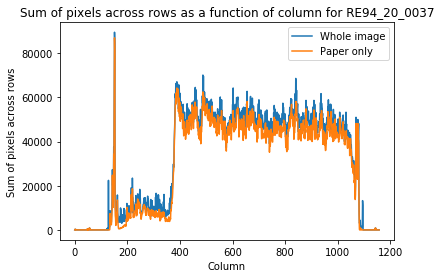

KeyboardInterrupt: 

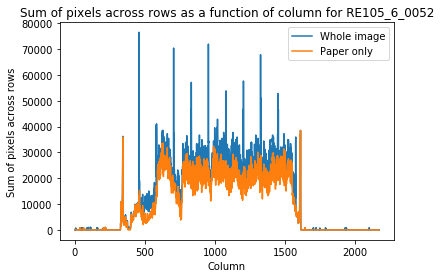

In [4]:
##########################
# Prototype code for margin detection

rootDir = '../ResizedSS4/'

# Create the directory for the outputs
path = "../Outputs/Plots/Ruler_Removed_Diff/"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
    
for x in range(len(ruler_tb)):
    
    # Get variables
    peaks = ruler_tb[x][1]
    filename = ruler_tb[x][0]
    
    # Check if the ruler is on the top or the bottom
    if len(ruler_tb[x][1][1]) > len(ruler_tb[x][1][0]):
        index = 1
    else:
        index = 0
        
    first_row = ruler_tb[x][1][index][1]
    last_row = ruler_tb[x][1][index][len(ruler_tb)-1]
    peak = ruler_tb[x][1][index]
    
#    print(peak)
    
    # Edge detection
    img = cv2.imread(rootDir + '/' + filename + '.jpg')
    gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gry,100,200)
    
    # Sum over rows to get a signal as a function of columns
    sig = np.sum(edges[peak], axis=0)
#    print(sig[300])
    
    sig2 = np.sum(edges, axis=0)
        
    # Plotting 
    plt.plot(sig2, label='Whole image')
    plt.plot(sig, label='Paper only')
    plt.ylabel('Sum of pixels across rows')
    plt.xlabel('Column')
    plt.legend()
    plt.title('Sum of pixels across rows as a function of column for ' + filename)
    plt.savefig(path + filename + '.svg')
    plt.show()